Q1. What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?

The fundamental idea of ensemble techniques is that a group of models, or "weak learners," can collectively produce a better, more accurate prediction than a single model. Bagging reduces variance by building independent models in parallel using random data subsets, while boosting reduces bias by building models sequentially, with each one focusing on correcting the previous model's errors

| Feature                | **Bagging (Bootstrap Aggregating)**                                             | **Boosting**                                                                          |
| :--------------------- | :------------------------------------------------------------------------------ | :------------------------------------------------------------------------------------ |
| **Objective**          | Reduce **variance** and avoid overfitting                                       | Reduce **bias** and improve weak learners                                             |
| **Approach**           | Build multiple **independent models** in parallel on random subsets of data     | Build models **sequentially**, each new model focuses on errors made by previous ones |
| **Data Sampling**      | Uses **bootstrap sampling** (random sampling *with replacement*)                | Uses **weighted sampling** — misclassified samples get higher weights                 |
| **Model Independence** | Each model is **independent** of others                                         | Each model is **dependent** on the previous one                                       |
| **Combining Results**  | Uses **averaging** (for regression) or **majority voting** (for classification) | Uses **weighted sum** of model predictions (stronger models get higher weight)        |
| **Main Goal**          | Reduce **variance** (stabilize predictions)                                     | Reduce **bias** (make model more accurate)                                            |
| **Examples**           | Random Forest, Bagged Decision Trees                                            | AdaBoost, Gradient Boosting, XGBoost, LightGBM                                        |


Q2. Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.


Random Forest reduces overfitting compared to a single decision tree through the principles of ensemble learning and randomization. A single decision tree can easily overfit by memorizing the training data, including noise, leading to poor generalization on unseen data. Random Forest mitigates this by constructing multiple decision trees and aggregating their predictions.

Mechanism of Overfitting Reduction:

* Bagging (Bootstrap Aggregating):

Each tree in a Random Forest is trained on a different bootstrap sample (a random sample with replacement) of the original training data. This introduces diversity among the trees, as each tree sees slightly different data.

* Feature Randomness: 

At each node split during the construction of a decision tree within the forest, only a random subset of the available features is considered. This further decorrelates the individual trees, preventing them from relying too heavily on any single feature and reducing the chance of all trees making the same errors.
Averaging/Majority Voting: For classification, the final prediction is determined by a majority vote among the individual trees. For regression, the predictions are averaged. This aggregation process smooths out the individual tree's errors and reduces the overall variance, leading to a more robust and less overfit model.

Role of Key Hyperparameters:

* n_estimators (Number of Trees): This hyperparameter controls the number of decision trees in the forest. Increasing n_estimators generally improves the model's robustness and reduces variance, as more individual predictions are aggregated, leading to a more stable and less overfit final prediction. However, a very large number can increase computational cost without significant performance gains.

* max_features (Maximum Features for Splitting): This hyperparameter determines the number of features considered when looking for the best split at each node of a decision tree. A smaller max_features value increases the randomness and decorrelation among trees, further reducing overfitting. Common choices include sqrt(n_features) or log2(n_features) for classification.

Q3. What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.

Stacking, or stacked generalization, is an ensemble learning technique that combines the predictions of multiple diverse base models using a meta-learner. The core idea is to train several base models on the original training data, then use their predictions as input features to train a higher-level model, the meta-learner, which makes the final prediction. 

Differences from traditional bagging/boosting methods:

* Heterogeneity of base models: Stacking typically employs a diverse set of base models (e.g., decision trees, support vector machines, neural networks) to capture different aspects of the data, while bagging (e.g., Random Forest) and boosting (e.g., AdaBoost, XGBoost) usually use homogeneous base models (often weak learners like decision stumps or shallow trees).

* Meta-learner: Stacking introduces a "meta-learner" to learn how to optimally combine the predictions of the base models. Bagging typically combines predictions through averaging (for regression) or voting (for classification), while boosting combines them sequentially, giving more weight to misclassified instances. 
Parallel vs. Sequential: Bagging trains base models in parallel, and stacking also trains base models independently before the meta-learner. Boosting, in contrast, trains models sequentially, with each new model focusing on correcting errors made by previous models.

Simple Example Use Case:

Imagine you are trying to predict house prices. You could use stacking as follows:

Base Models: Train three different models on your house price dataset:

A Linear Regression model.

A Random Forest Regressor.

A Gradient Boosting Regressor.

Generate Predictions: Use each of these trained base models to make predictions on a separate validation set (or use cross-validation to generate out-of-fold predictions for the training set).

Meta-Learner Training: Create a new dataset where the features are the predictions from your three base models on the validation set, and the target variable is the actual house prices from the validation set. Train a meta-learner (e.g., a simple Ridge Regression or even another Random Forest) on this new dataset to learn how to best combine the predictions from the base models.


Final Prediction: When predicting a new house price, first get predictions from all three base models, then feed these predictions into your trained meta-learner to obtain the final, stacked prediction.

Q4. What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?

The OOB (Out-of-Bag) Score is a performance metric for Random Forest models that uses data not used in training individual trees to evaluate the model's generalization error. It is useful because it provides an internal validation, eliminating the need for a separate validation set and allowing you to assess performance on "unseen" data during the training process itself. To calculate it, each data point is predicted only by the trees that did not use it in their bootstrap sample, and these predictions are aggregated to estimate the model's accuracy.  

* How the OOB score is calculated and why it is useful

Internal validation: Random Forests are built on bootstrap aggregating (bagging), where each tree is trained on a random sample of the data with replacement. This means that for each tree, about one-third of the original data points are left out, or "out-of-bag". 

Predicting with OOB samples: To get the OOB score, each data point is predicted using only the trees that did not see that specific point during their training. 

Aggregate predictions: The predictions for a given data point are combined, for example, by a majority vote in classification, to make a final prediction. 

Estimating accuracy: This OOB prediction is then compared to the true value of the data point to calculate an error rate for that point. 

Overall score: The final OOB score is the average error rate across all data points, providing a single metric that estimates the model's performance on unseen data. 

* How it helps model evaluation without a separate validation set

Conserves data: By using the OOB samples for validation, you can keep your entire dataset for training, which is particularly beneficial for smaller datasets where splitting off a validation set would significantly reduce the amount of data available for training. 

During training: The OOB score can be monitored as more trees are added to the forest, allowing you to see when the error rate has stabilized and if adding more trees will improve performance. 

Model selection and tuning: The OOB score can be used to compare different models or to tune hyperparameters for the Random Forest, much like a traditional validation set would be used. 

An estimate of generalization: The OOB score provides a reliable estimate of how well the model will generalize to new data, giving you an indicator of the model's true accuracy on unseen data. 

Q5. Compare AdaBoost and Gradient Boosting in terms of:

● How they handle errors from weak learners

● Weight adjustment mechanism

● Typical use cases

AdaBoost and Gradient Boosting are both ensemble methods that combine multiple weak learners to create a strong learner, but they differ in their mechanisms:

* Handling Errors from Weak Learners:

AdaBoost: Focuses on misclassified samples. It identifies samples that previous weak learners got wrong and gives them higher importance (weights) in subsequent training iterations. This forces the next weak learner to concentrate more on these difficult-to-classify samples.

Gradient Boosting: Focuses on the residuals or errors of the previous models. Instead of reweighting samples, it trains subsequent weak learners to predict the negative gradient of the loss function with respect to the current ensemble's prediction. This effectively means each new learner tries to correct the "mistake" (residual) of the combined previous models.

* Weight Adjustment Mechanism:

AdaBoost: Adjusts the weights of the training samples. Misclassified samples receive increased weights, while correctly classified samples receive decreased weights. Additionally, each weak learner is assigned a weight based on its accuracy, with more accurate learners receiving higher weights in the final ensemble.

Gradient Boosting: Does not directly adjust sample weights. Instead, it adjusts the weights of the weak learners in the final ensemble by adding them sequentially in a way that minimizes a chosen loss function using gradient descent. The "weight" of a new weak learner is determined by how well it predicts the negative gradient (residuals).

* Typical Use Cases:

AdaBoost: Primarily used for binary classification problems. It is known for its simplicity, speed, and interpretability, especially when using simple weak learners like decision stumps. It can be effective on clean datasets but is sensitive to noisy data and outliers due to its aggressive reweighting mechanism.
Examples: Face detection, text classification.

Gradient Boosting: More flexible and can be applied to a wider range of problems, including classification, regression, and ranking. It can utilize more complex weak learners (e.g., deeper decision trees) and often achieves higher accuracy, especially on complex and noisy datasets. However, it can be more computationally expensive and sensitive to hyperparameters.
Examples: Credit risk assessment, fraud detection, customer churn prediction, medical diagnosis.

Q6. Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.

CatBoost performs well on categorical features because it handles them natively using an internal technique called ordered boosting instead of requiring preprocessing like one-hot encoding. This method converts categorical features into numerical ones by creating a permutation-based, target-encoded representation that is calculated without data leakage, which significantly improves the model's ability to handle categorical variables effectively. 

* Handling of categorical variables

Ordered boosting: CatBoost's core innovation is ordered boosting, a specific permutation-driven method for processing categorical features. 

Internal encoding: It uses a novel target encoding strategy that avoids the data leakage issues common with other methods, ensuring a more accurate representation. 

Permutation-based: The model generates a numerical representation for categorical variables by permuting them during training. This process allows the model to learn from the 
relationship between the categories and the target variable without needing manual preprocessing steps. 

Oblivious trees: CatBoost also uses oblivious trees, which are symmetric and have the same splitting criteria on each level of the tree. This helps to prevent overfitting and improves the model's generalization to new data. 

Q7. KNN Classifier Assignment: Wine Dataset Analysis with Optimization

Task:

1. Load the Wine dataset (sklearn.datasets.load_wine()).

2. Split data into 70% train and 30% test.

3. Train a KNN classifier (default K=5) without scaling and evaluate using:

        a. Accuracy

        b. Precision, Recall, F1-Score (print classification report)

4. Apply StandardScaler, retrain KNN, and compare metrics.

5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric (Euclidean, Manhattan).

6. Train the optimized KNN and compare results with the unscaled/scaled versions.

In [3]:
# ===============================================
# KNN Classifier Assignment: Wine Dataset Analysis
# ===============================================

# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

# ---------------------------------------------------
# Train KNN Classifier (default K=5) without scaling
# ---------------------------------------------------
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)

# Evaluate performance
print("\n KNN without scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred_unscaled))
print("Classification Report:\n", classification_report(y_test, y_pred_unscaled))

# ---------------------------------------------------
# Apply StandardScaler, retrain KNN, and compare metrics
# ---------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\n KNN with StandardScaler:")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))

# ---------------------------------------------------
# Use GridSearchCV to find the best K and distance metric
# ---------------------------------------------------
param_grid = {
    'n_neighbors': list(range(1, 21)),      # Test K = 1 to 20
    'metric': ['euclidean', 'manhattan']    # Distance metrics
}

grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

print("\n Best Parameters from GridSearchCV:")
print(grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# ---------------------------------------------------
# Train the optimized KNN and compare results
# ---------------------------------------------------
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)

print("\n Optimized KNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# ---------------------------------------------------
# Summary Comparison
# ---------------------------------------------------
print("\n===== Model Performance Comparison =====")
print(f"Unscaled KNN Accuracy:  {accuracy_score(y_test, y_pred_unscaled):.4f}")
print(f"Scaled KNN Accuracy:    {accuracy_score(y_test, y_pred_scaled):.4f}")
print(f"Optimized KNN Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")


Training samples: 124
Test samples: 54

 KNN without scaling:
Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


 KNN with StandardScaler:
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


 Best Parameters from GridSearchCV:
{'metr

Q8. PCA + KNN with Variance Analysis and Visualization
Task:

1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).

2. Apply PCA and plot the scree plot (explained variance ratio).

3. Retain 95% variance and transform the dataset.

4. Train KNN on the original data and PCA-transformed data, then compare accuracy.

5. Visualize the first two principal components using a scatter plot (color by class).

Dataset shape: (569, 30)
Number of classes: 2


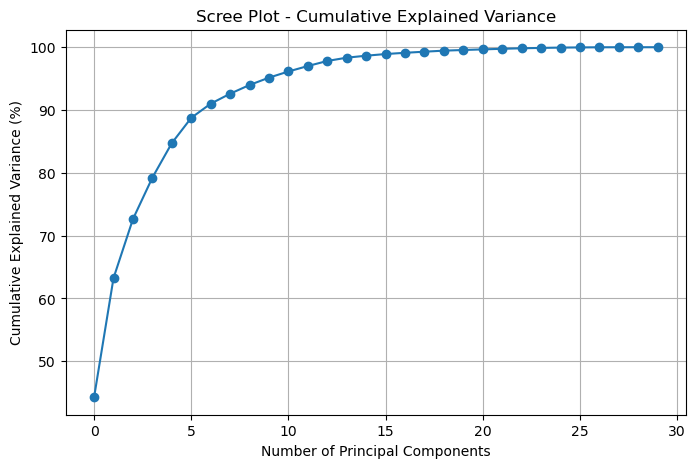

Original features: 30
Reduced features after PCA (95% variance): 10

🔹 KNN Performance Comparison:
Accuracy on Original Data: 0.9708
Accuracy on PCA-Reduced Data (95% variance): 0.9474


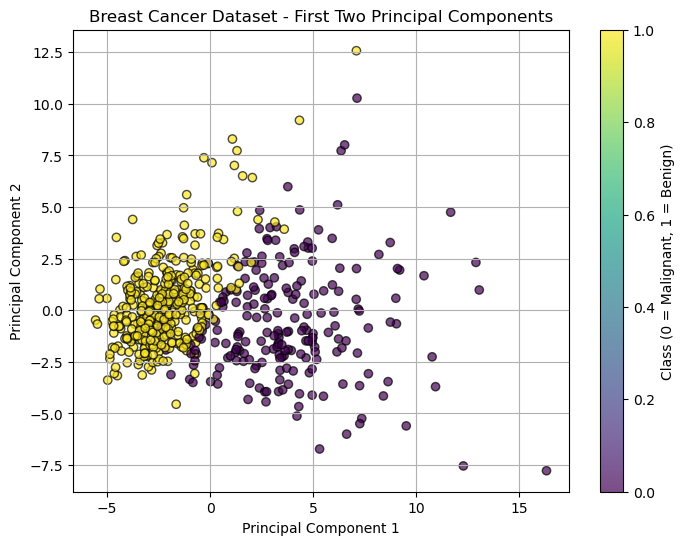

In [4]:
# ===============================================
# PCA + KNN Analysis on Breast Cancer Dataset
# ===============================================

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# ---------------------------------------------------
# Load the Breast Cancer dataset
# ---------------------------------------------------
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

print("Dataset shape:", X.shape)
print("Number of classes:", len(np.unique(y)))

# ---------------------------------------------------
# Apply PCA and plot Scree Plot (Explained Variance Ratio)
# ---------------------------------------------------
# Scale data before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (keep all components initially)
pca = PCA()
pca.fit(X_scaled)

# Scree plot: explained variance ratio
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, marker='o')
plt.title('Scree Plot - Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.grid(True)
plt.show()

# ---------------------------------------------------
# Retain 95% variance and transform dataset
# ---------------------------------------------------
pca_95 = PCA(n_components=0.95)  # Automatically select #components for 95% variance
X_pca = pca_95.fit_transform(X_scaled)

print(f"Original features: {X.shape[1]}")
print(f"Reduced features after PCA (95% variance): {X_pca.shape[1]}")

# ---------------------------------------------------
# Split data into train/test sets
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

X_pca_train, X_pca_test, _, _ = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)

# ---------------------------------------------------
# Train KNN on original data and PCA-transformed data
# ---------------------------------------------------
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_orig = knn_original.predict(X_test)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca_train, y_train)
y_pred_pca = knn_pca.predict(X_pca_test)

# Evaluate and compare
acc_orig = accuracy_score(y_test, y_pred_orig)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("\n🔹 KNN Performance Comparison:")
print(f"Accuracy on Original Data: {acc_orig:.4f}")
print(f"Accuracy on PCA-Reduced Data (95% variance): {acc_pca:.4f}")

# ---------------------------------------------------
# Visualization: First two principal components
# ---------------------------------------------------
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(
    X_2d[:, 0], X_2d[:, 1],
    c=y, cmap='viridis', alpha=0.7, edgecolors='k'
)
plt.title('Breast Cancer Dataset - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class (0 = Malignant, 1 = Benign)')
plt.grid(True)
plt.show()


Q9. KNN Regressor with Distance Metrics and K-Value Analysis

Task:

1. Generate a synthetic regression dataset (sklearn.datasets.make_regression(n_samples=500, n_features=10)).

2. Train a KNN regressor with:

        a. Euclidean distance (K=5)

        b. Manhattan distance (K=5)
        
        c. Compare Mean Squared Error (MSE) for both.

3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

🔹 KNN Regression Results (K=5):
Euclidean Distance - MSE: 4989.2901
Manhattan Distance - MSE: 5558.4380


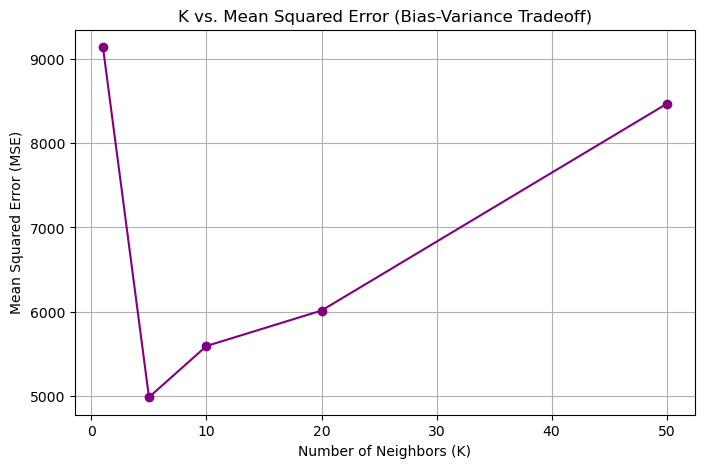


===== Bias-Variance Analysis =====
K= 1 → MSE=9133.6648
K= 5 → MSE=4989.2901
K=10 → MSE=5595.7684
K=20 → MSE=6015.5258
K=50 → MSE=8462.5744

 Observation:
- Small K (e.g., K=1) → Low bias, high variance (model may overfit).
- Large K (e.g., K=50) → High bias, low variance (model may underfit).
- Optimal K balances bias and variance, giving lowest MSE.


In [5]:
# ===============================================
# KNN Regressor Assignment: Distance & K Analysis
# ===============================================

# 1️. Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# ---------------------------------------------------
# 2️. Generate a synthetic regression dataset
# ---------------------------------------------------
X, y = make_regression(
    n_samples=500, 
    n_features=10, 
    noise=15, 
    random_state=42
)

# Split into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features for better distance-based performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------------------------------
# 3️. Train KNN Regressor with Euclidean and Manhattan distances (K=5)
# ---------------------------------------------------
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)

knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)

# Compute Mean Squared Error (MSE)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print("🔹 KNN Regression Results (K=5):")
print(f"Euclidean Distance - MSE: {mse_euclidean:.4f}")
print(f"Manhattan Distance - MSE: {mse_manhattan:.4f}")

# ---------------------------------------------------
# 4️. Analyze Bias-Variance Tradeoff (Varying K values)
# ---------------------------------------------------
k_values = [1, 5, 10, 20, 50]
mse_list = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

# ---------------------------------------------------
# 5️. Plot K vs. MSE
# ---------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(k_values, mse_list, marker='o', linestyle='-', color='purple')
plt.title('K vs. Mean Squared Error (Bias-Variance Tradeoff)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

# ---------------------------------------------------
#  Interpretation
# ---------------------------------------------------
print("\n===== Bias-Variance Analysis =====")
for k, mse in zip(k_values, mse_list):
    print(f"K={k:2d} → MSE={mse:.4f}")

print("\n Observation:")
print("- Small K (e.g., K=1) → Low bias, high variance (model may overfit).")
print("- Large K (e.g., K=50) → High bias, low variance (model may underfit).")
print("- Optimal K balances bias and variance, giving lowest MSE.")


Q10. KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data

Task:

1. Load the Pima Indians Diabetes dataset (contains missing values).

2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.

3. Train KNN using:

        a. Brute-force method

        b. KD-Tree

        c. Ball Tree

4. Compare their training time and accuracy.

5. Plot the decision boundary for the best-performing method (use 2 most important features).

Dataset: Pima Indians Diabetes

Dataset shape: (768, 9)
Missing values before imputation:
 Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Missing values after imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

🔹 KNN Algorithm Comparison:
BRUTE      → Accuracy: 0.7446, Training Time: 0.0000 sec
KD_TREE    → Accuracy: 0.7446, Training Time: 0.0020 sec
BALL_TREE  → Accuracy: 0.7446, Training Time: 0.0050 sec

✅ Best Performing Method: BRUTE

Classification Report for Best Model:
               precision    recall  f1-score   sup

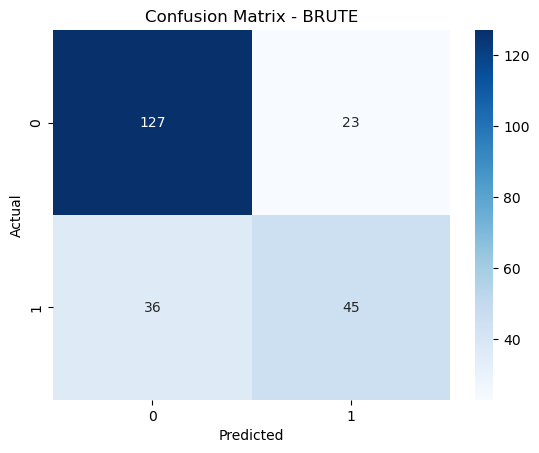

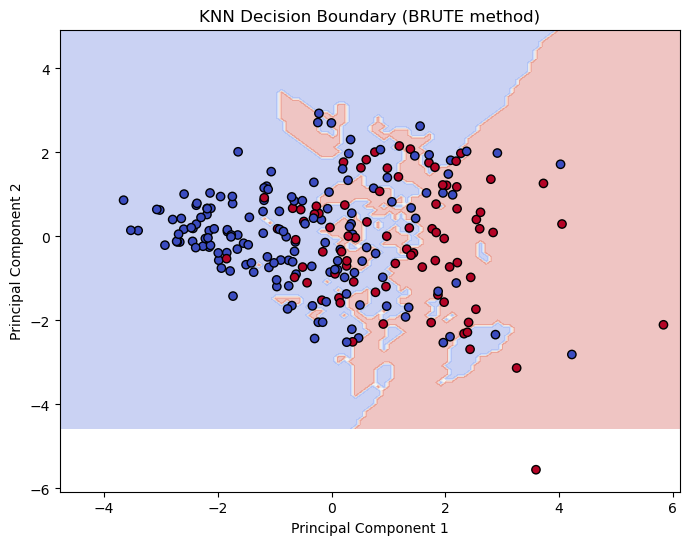

In [6]:
# ===============================================
# KNN Classifier with KD-Tree / Ball Tree / Imputation
# Dataset: Pima Indians Diabetes
# ===============================================

# 1️. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

# ---------------------------------------------------
# 2️. Load the Dataset
# ---------------------------------------------------
# Dataset link (you can replace path if stored locally)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]
data = pd.read_csv(url, names=columns)

print("Dataset shape:", data.shape)
print("Missing values before imputation:\n", (data == 0).sum())

# ---------------------------------------------------
# 3️. Handle Missing Values Using KNNImputer
# ---------------------------------------------------
# Replace 0s in certain columns with NaN (these cannot be 0 in real life)
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_missing] = data[cols_with_missing].replace(0, np.nan)

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

print("\nMissing values after imputation:\n", data_imputed.isna().sum())

# ---------------------------------------------------
# 4️. Split the Dataset
# ---------------------------------------------------
X = data_imputed.drop('Outcome', axis=1)
y = data_imputed['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ---------------------------------------------------
# 5️. Feature Scaling
# ---------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------------------------------
# 6️. Train KNN with Different Algorithms
# ---------------------------------------------------
methods = ['brute', 'kd_tree', 'ball_tree']
results = {}

for method in methods:
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=method)
    knn.fit(X_train_scaled, y_train)
    end = time.time()
    
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[method] = {
        'accuracy': acc,
        'time': end - start
    }

# ---------------------------------------------------
# 7️. Display and Compare Results
# ---------------------------------------------------
print("\n🔹 KNN Algorithm Comparison:")
for method, res in results.items():
    print(f"{method.upper():<10} → Accuracy: {res['accuracy']:.4f}, Training Time: {res['time']:.4f} sec")

best_method = max(results, key=lambda m: results[m]['accuracy'])
print(f"\n✅ Best Performing Method: {best_method.upper()}")

# ---------------------------------------------------
# 8️. Train Final Model using Best Method
# ---------------------------------------------------
knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_method)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)

print("\nClassification Report for Best Model:\n", classification_report(y_test, y_pred_best))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_method.upper()}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ---------------------------------------------------
# 9️. Decision Boundary Visualization (Top 2 Features)
# ---------------------------------------------------
# For visualization, reduce to 2 most important features using PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_scaled)
X_test_2d = pca.transform(X_test_scaled)

knn_vis = KNeighborsClassifier(n_neighbors=5, algorithm=best_method)
knn_vis.fit(X_train_2d, y_train)

# Create a mesh grid for plotting decision regions
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap='coolwarm', edgecolors='k')
plt.title(f'KNN Decision Boundary ({best_method.upper()} method)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
